# Worksheet 06

Name: Jonathan Thomas
UID: U81823882

### Topics

- Kmeans ++
- Hierarchical Clustering

### Kmeans ++

a) What is the difference between K means and K means ++?

Kmeans uses random initial points while Kmeans++ applies a probability to each point based on how far away it is.

b) What are some limitations of K means ++?

As its a distance based algorithm, data that doesn't relate well with distance (such as a DNA helix) won't be able to be properly classified.

c) Interpret the silhouette plot below. It's a histogram where each bar corresponds to the silhouette score for that data point. Comment on which number of clusters K (2,3,4 or 5) you would choose and why. (the red dotted line is the average silhouette score over the entire dataset).

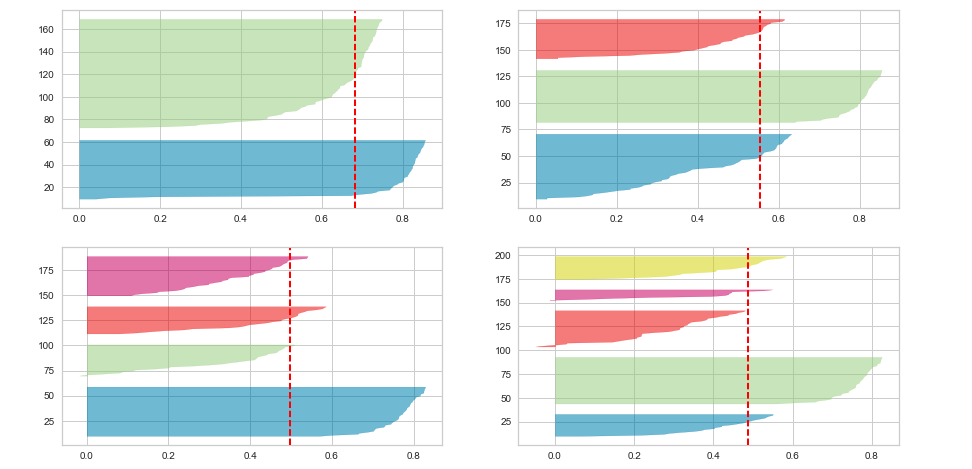

In [ ]:
from IPython.display import Image
Image(filename="silhouette.png", width=500, height=500)

K=2 would be best followed by K=3 as the most points of each cluster are close together (matches silhouette). The others have significant disimilarity.

### Hierarchical Clustering

Using the following dataset:

| Point | x | y |
|-------|---|---|
| A     | 0 | 0 |
| B     | 1 | 1 |
| C     | 3 | 0 |
| D     | 0 | 1 |
| E     | 2 | 2 |

with

d = Euclidean  
D = Single-Link

produce the distance matrix at every step of the hierarchical clustering algorithm.

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | √2  |  3 | 1  | 2√2  |
| B |  √2 | 0 |  √5 | 1  |  √2 |
| C |  3 | √5  | 0 |  √10 |  √5 |
| D |  1 | 1  |  √10 | 0 |  √5 |
| E | 2√2  |  √2 |  √5 | √5  | 0 |

Step 2

|   | A&D | B | C |  E|
|---|---|---|---|---|
|A&D   | 0 |  1 | 3  | √5  |
|  B | 1  | 0 | √5  |  √2 |
|  C |  3 | √5  | 0 | √5  |
| E  |  √5 | √2  | √5  | 0 |

Step 3

|   | A&B&D  |  C |  E |
|---|---|---|---|
| A&B&D  | 0 | √5  | √2  |
| C  | √5  | 0 |  √5 |
|  E |  √2 | √5  | 0 |

Step 4

|   |  A&B&D&E | C  |
|---|---|---|
|  A&B&D&E | 0 | √5  |
|  C |  √5 | 0 |

Repeat the above with

d = Euclidean  
D = Complete-Link

Step 1

|   | A | B | C | D | E |
|---|---|---|---|---|---|
| A | 0 | √2  |  3 | 1  |  2√2 |
| B | √2  | 0 | √5  | 1  |  √2 |
| C |  3 |  √5 | 0 |  √10 | √5  |
| D | 1  | 1  | √10  | 0 |  √5 |
| E |  2√2 | √2  |  √5 | √5  | 0 |

Step 2

|   | A&D  | B  | C  | E  |
|---|---|---|---|---|
|  A&D | 0 |  √2 |  √10 | 2√2  |
|  B |  √2 | 0 |  √5 | √2  |
|  C |  √10 |  √5 | 0 | √5  |
|  E | 2√2  |  √2 |  √5 | 0 |

Step 3

|   | A&B&D  |  C | E  |
|---|---|---|---|
|  A&B&D | 0 | √10  |  2√2 |
| C  |  √10 | 0 |  √5 |
| E  | 2√2  |  √5 | 0 |

Step 4

|   |  A&B&D |  C&E |
|---|---|---|
| A&B&D  | 0 |  √10 |
|  C&E | √10  | 0 |

## Challenge Problem

### Input:
- Some DNA sequences, each sequence is on a new line. All sequences are of equal length and consist of characters from the set {A, C, G, T}.


### Task:
- Implement a hierarchical clustering algorithm using Hamming distance as the metric clustering DNA sequences.

### Definition of Hamming Distance:

The Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. Mathematically, if we have two strings, $s$ and $t$, of equal length, then the Hamming distance $H(s, t)$ is given by:

$$ H(s, t) = \sum_{i=1}^{n} [s_i \neq t_i] $$

where $n$ is the length of the strings, $s_i$ and $t_i$ are the characters at position $i$ in $s$ and $t$ respectively, and $[s_i \neq t_i]$ is an indicator function, equal to 1 if $s_i \neq t_i$ and 0 otherwise.


### Guidelines:
1. **Read the Dataset**: Choose appropriate data structure.
2. **Compute Hamming Distance**: Implement a function to calculate the Hamming distance between any two sequences.
3. **Hierarchical Clustering**: Apply the hierarchical clustering algorithm using the single-linkage method.
4. **Dendrogram**: Generate a dendrogram to visualize the clustering.
5. **NOTE**: You may use any Python library, but be sure to understand the underlying algorithm.

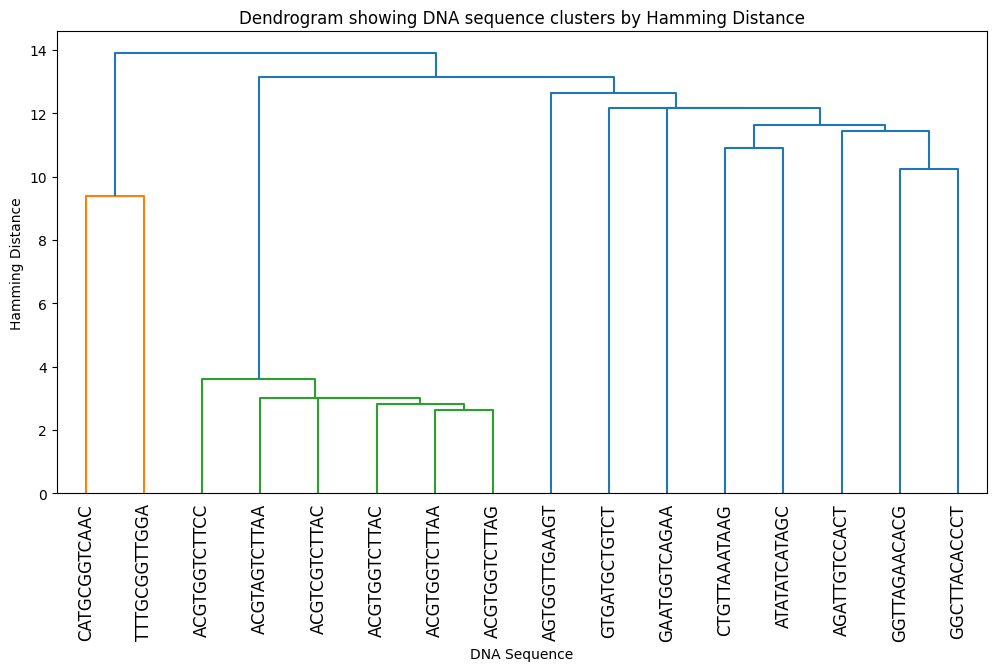

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
import math
import warnings
warnings.filterwarnings('ignore')  

sequences = [
 'ACGTGGTCTTAA',
 'ACGTCGTCTTAC',
 'ACGTGGTCTTAC',
 'ACGTAGTCTTAA',
 'ACGTGGTCTTCC',
 'ACGTGGTCTTAG',
 'CTGTTAAATAAG',
 'GGTTAGAACACG',
 'AGTGGTTGAAGT',
 'GGCTTACACCCT',
 'AGATTGTCCACT',
 'CATGCGGTCAAC',
 'ATATATCATAGC',
 'TTTGCGGTTGGA',
 'GAATGGTCAGAA',
 'GTGATGCTGTCT']

def hamming(str1, str2):
    count = 0
    for i in range(len(str1)):
        if str1[i] != str2[i]:
            count += 1
    return count

def euclidean(x, y):
    return math.sqrt(((y[0] - x[0]) ** 2) + ((y[1] - x[1]) ** 2))

data = np.array(sequences)
#data = np.array([[0,0], [1,1], [3, 0], [0, 1], [2,2]])

distance_matrix = np.zeros((len(data), len(data)))

for i in range(len(data)):
    for j in range(len(data)):
        distance_matrix[i, j] = hamming(data[i], data[j])

linkage_matrix = linkage(distance_matrix, method='single')

plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix, labels = data)
plt.title('Dendrogram showing DNA sequence clusters by Hamming Distance')
plt.xlabel('DNA Sequence')
plt.xticks(rotation=90)
plt.ylabel('Hamming Distance')
plt.show()




